### App's ads attraction analysis projects

 The goal of this project is to see which apps in App store/Google play attract most users and recommend to our developer's free-apps, ads dependant model. 


Note: Pandas and Numpy will not be used in this project.

In [42]:
from csv import reader  #opening our data sets.

#App Store data set
opened_file= open('AppleStore.csv', encoding="utf8")
read_file= reader(opened_file)
ios = list(read_file)
ios_header=ios[0]
ios= ios[1:]

#Google play data set
opened_file= open('googleplaystore.csv', encoding="utf8")
read_file=reader(opened_file)
android= list(read_file)
android_header= android[0]
android= android[1:]

del opened_file,read_file

In [43]:
def explore_data(dataset, start , end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print ('\n') # to add an empty line after each row
    if rows_and_columns:
        print(f'Number of rows: {len(dataset)}')
        print(f'Number of columns: {len(dataset[0])}')

In [44]:
# Exploring IOS data set
print(ios_header)
print('\n')
explore_data(ios, 1, 4 , True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


Number of rows: 7197
Number of columns: 16


Here we can see that the App store data set contains 7197 apps and 16 columns. Looking at our columns we can recognize that there are a few that might help our analysis and those columns are: ***'track_name'*** , ***'price'*** , ***'rating_count_tot'*** , ***'prime_genre'*** , ***'cont_rating'***

In [45]:
#Exploring android data set 
print(android_header)
print('\n')
explore_data(android, 1, 4 , True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 10841
Number of columns: 13


We can see that Google play data set contains 10841 apps and 13 columns. Logically thinking these are the few columns that might be useful in our analysis : ***'App'*** ,  ***'Price'*** , ***'Installs'*** , ***'Type'*** , ***'Reviews'*** , and last but certainly not least is ***'Genres'***

### Now we will start the process of Data Cleaning:
- Detect inaccurate data and then correct or remove it.
- Detect duplicate data then remove it.
- Remove non-English apps because our target audience is *English* speakers.
- Remove paid apps because our developers on publish *free* apps.

## Deleting Wrong Data
 The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct. 

In [46]:
print(android[10472]) # wrong row
print('\n')
print(android_header)
print('\n')
print(android[0]) # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The mentioned row *10472* corresponds to **Life Made WI-Fi Touchscreen Photo Frame** as we can see above, and we can see that the rating is '19'. This is obviously off since the maximum rating for a Google Play app is 5. We'll have to delete this row.

In [47]:
print(len(android))
del android[10472]
print(len(android)) # Showing the size after deletion

10841
10840


## Removing duplicate Entries
#### Part one
If we explore our Google Play data set long enough, we'll find that some apps have more than one entry. For example, *'Instagram'* has four entries:


In [48]:
for app in android:
    name= app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In total, there are 1,181 cases of duplicate entries:

In [49]:
duplicate_apps= []
unique_apps= []

for app in android:
    name =app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
print (f'Number of duplicate apps: {len(duplicate_apps)}')
print('\n')
print (f'Some examples of duplicate apps: {duplicate_apps[:10]}')

Number of duplicate apps: 1181


Some examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


We surely don't want duplicate apps in our data set when we analyze, so we need to remove duplicate entries and keep only one per app. We could remove the duplicates randomly ,but we should find a better way to do it.

If we look closely 2 cells above we can see that *'Instagram'* has 4 entries , and we notice that different entries have different number of reviews So going from there we can determine that if the entry has more reviews that means the data was collected at more recent time than the lower reviews entry. We can use this to build a criterion for keeping rows. We won't remove randomly from duplicate entries ,but rather we'll keep the rows that have the highest number of reviews out of them. Because the higher the number, the more reliable the ratings will be and it is more recent.

To do that, we will:
- Create a dictionary where each key is a unique app name ,and the value is the highest number of reviews for that app
- Use dictionary to create a new data set, which will have only one entry per app -following our criterion mentioned above-

## Part Two
Let's start by building our dictionary.

In [50]:
max_reviews={}

for app in android:
    name =app[0]
    n_reviews=float(app[3])
    
    if name in max_reviews and max_reviews[name] < n_reviews:
        max_reviews[name]=n_reviews
        
    elif name not in max_reviews:
        max_reviews[name]=n_reviews

We previously found that there are 1,181 cases of duplicate entries, so the length of our dictionary( of unique apps) we just created should be equal to the difference in our data set's length and 1,181.

In [51]:
print(f'Expected length: {len(android) - 1181}')
print(f'Actual length: {len(max_reviews)}')

Expected length: 9659
Actual length: 9659


Now we will use the `max_reviews` dictionary to remove duplicates. As mentioned before we will stick to our criterion and only keep the entries with the highest number of reviews. In the code cell below:
- We start by initializing two empty list, `android_clean` and `already_added`
-  We loop through `android` data set, and each iteration:
    * We isolate the name of the app and the number of the reviews.
    * We add the current row (`app`) to the `android_clean` list, adn the app name(`name`) to the `already_added` list if:
        - The number of reviews of the current app matches the number of reviews of that app as described in the `max_reviews` dictionary
        - The name of the app is not already in the `already_added` list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry. If we just check for `max_reviews[name] == n_reviews`, we'll still end up with duplicate entries for some apps.

In [52]:
android_clean= []
already_added= []

for app in android:
    name = app[0]
    n_reviews= float(app[3])
    if (max_reviews[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)    

Now let's go back and explore the new data set, and confirm that the number of rows is 9,659

In [53]:
explore_data(android_clean , 0 , 3 , True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


As expected we have 9,659 rows.

## Removing Non-English Apps
#### Part One
If you explore the data sets enough, you'll notice the names of some of the apps suggest they are not directed toward an English-speaking audience. Below we'll print a few examples of this

In [54]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


As mentioned before our target audience is strictly English-speakers, so we're going to remove them since we're not interested in keeping these kind of apps. We will create a function to recognize weather the entry is english or not.
All characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build our function and maybe keep it really simple for example by basically checking if an app's name contains a non-ASCII character.

In [55]:
def is_english(string):
    for char in string:
        if ord(char) > 127:
            return False
    return True
print(is_english('Facebook'))
print(is_english('لعبة تقدر تربح DZ'))

True
False


The function seems to work, but some English app names might want to use emojis or other symbols that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [56]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


## Part Two
To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [57]:
def is_english(string):
    non_ascii=0
    for char in string:
        if ord(char) > 127:
            non_ascii+=1
    if non_ascii > 3:
        return False
    else:
        return True
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('لعبة تقدر تربح DZ'))

True
True
False


We certainly can optimize our filter to get more prevent the few non-english apps that will get past the filter ,but this is good enough at this point. We shouldn't spend too much time on optimization now.

Now we'll use the `is_english()` function to filter out the non-English apps for both data sets:

In [58]:
android_english= []
ios_english= []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(ios_english , 0 , 3 , True)
print('\n')
explore_data(android_english , 0 , 3 , True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 6183
Number of columns: 16


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Vari

We can see that we're left with 6,183 iOS apps and 9,614 Android apps.

## Isolating Free Apps
As we mentioned in the introduction we only build free apps, and our main source of revenue consists of in-app ads. Our data sets contain both **free** and **paid** apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both of our data sets. 

In [59]:
android_final = []
ios_final = []

for app in android_english:
    price= app[7]
    if price == '0':
        android_final.append(app)

for app in ios_english:
    price= app[4]
    if price == '0.0':
        ios_final.append(app)
print(f'Final Android data set: {len(android_final)}')
print(f'Final iOS data set: {len(ios_final)}')

Final Android data set: 8864
Final iOS data set: 3222


We're finally left with 8,864 Android apps and 3,222 iOS apps, which should be enough for our analysis.

## Most Common Apps by Genre
#### Part One
As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:
1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we then develop it further.
3. If the app is profitable after six months, we also build an iOS version and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the ***prime_genre*** column of the App Store data set, and the ***Genres*** and ***Category*** columns of the Google Play data set.

#### Part Two
We'll build two functions we can use to analyze the frequency tables:
- One function to generate frequency tables that show percentages
- Another function that we can use to display the percentages in a descending order

In [60]:
def freq_table(dataset, index):
    table= {}
    total= 0
    for row in dataset:
        total+=1
        value = row[index]
        if value in table:
            table[value]+=1
        else:
            table[value]=1
    table_percentages={}
    for key in table:
        percentage = (table[key]/total) * 100
        table_percentages[key] = percentage
    return table_percentages

def display_table(dataset , index):
    table= freq_table(dataset , index)
    show_table= []
    for key in table:
        tuple_key_value= (table[key], key)
        show_table.append(tuple_key_value)
        
    table_sorted = sorted(show_table,reverse = True)
    for entry in table_sorted:
        print(entry[1],':', str(round(entry[0],2))+'%')

#### Part Three
We start by displaying the frequency table for the ***prime_genre*** column of the App Store data set.

In [61]:
display_table(ios_final,-5)

Games : 58.16%
Entertainment : 7.88%
Photo & Video : 4.97%
Education : 3.66%
Social Networking : 3.29%
Shopping : 2.61%
Utilities : 2.51%
Sports : 2.14%
Music : 2.05%
Health & Fitness : 2.02%
Productivity : 1.74%
Lifestyle : 1.58%
News : 1.33%
Travel : 1.24%
Finance : 1.12%
Weather : 0.87%
Food & Drink : 0.81%
Reference : 0.56%
Business : 0.53%
Book : 0.43%
Navigation : 0.19%
Medical : 0.19%
Catalogs : 0.12%


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.) while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are rarer. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users.

Let's continue by displaying the ***Genres*** and ***Category*** columns of the Google Play data set (two columns whuch seem to be related)

In [62]:
display_table(android_final,1) # Category

FAMILY : 18.91%
GAME : 9.72%
TOOLS : 8.46%
BUSINESS : 4.59%
LIFESTYLE : 3.9%
PRODUCTIVITY : 3.89%
FINANCE : 3.7%
MEDICAL : 3.53%
SPORTS : 3.4%
PERSONALIZATION : 3.32%
COMMUNICATION : 3.24%
HEALTH_AND_FITNESS : 3.08%
PHOTOGRAPHY : 2.94%
NEWS_AND_MAGAZINES : 2.8%
SOCIAL : 2.66%
TRAVEL_AND_LOCAL : 2.34%
SHOPPING : 2.25%
BOOKS_AND_REFERENCE : 2.14%
DATING : 1.86%
VIDEO_PLAYERS : 1.79%
MAPS_AND_NAVIGATION : 1.4%
FOOD_AND_DRINK : 1.24%
EDUCATION : 1.16%
ENTERTAINMENT : 0.96%
LIBRARIES_AND_DEMO : 0.94%
AUTO_AND_VEHICLES : 0.93%
HOUSE_AND_HOME : 0.82%
WEATHER : 0.8%
EVENTS : 0.71%
PARENTING : 0.65%
ART_AND_DESIGN : 0.64%
COMICS : 0.62%
BEAUTY : 0.6%


The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes(family,tools,business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

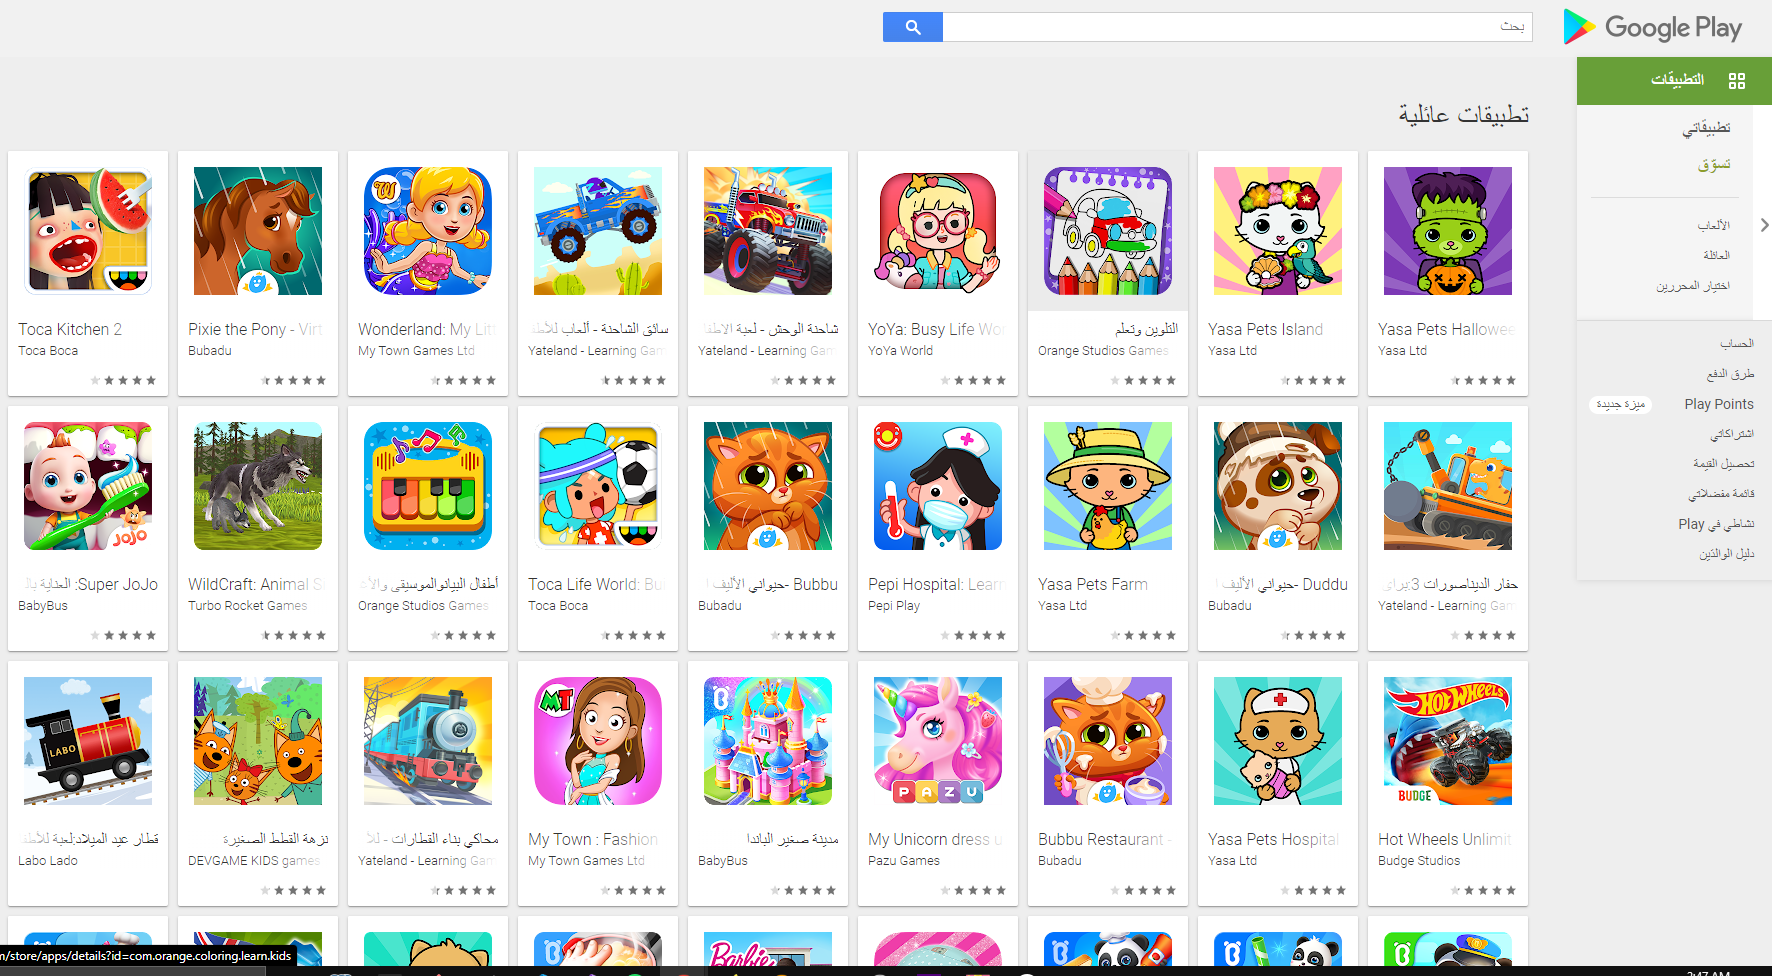

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This statement is also confirmed by the frequency table we see for the ***Genres*** column:

In [63]:
display_table(android_final, -4) #Genres

Tools : 8.45%
Entertainment : 6.07%
Education : 5.35%
Business : 4.59%
Productivity : 3.89%
Lifestyle : 3.89%
Finance : 3.7%
Medical : 3.53%
Sports : 3.46%
Personalization : 3.32%
Communication : 3.24%
Action : 3.1%
Health & Fitness : 3.08%
Photography : 2.94%
News & Magazines : 2.8%
Social : 2.66%
Travel & Local : 2.32%
Shopping : 2.25%
Books & Reference : 2.14%
Simulation : 2.04%
Dating : 1.86%
Arcade : 1.85%
Video Players & Editors : 1.77%
Casual : 1.76%
Maps & Navigation : 1.4%
Food & Drink : 1.24%
Puzzle : 1.13%
Racing : 0.99%
Role Playing : 0.94%
Libraries & Demo : 0.94%
Auto & Vehicles : 0.93%
Strategy : 0.91%
House & Home : 0.82%
Weather : 0.8%
Events : 0.71%
Adventure : 0.68%
Comics : 0.61%
Beauty : 0.6%
Art & Design : 0.6%
Parenting : 0.5%
Card : 0.45%
Casino : 0.43%
Trivia : 0.42%
Educational;Education : 0.39%
Board : 0.38%
Educational : 0.37%
Education;Education : 0.34%
Word : 0.26%
Casual;Pretend Play : 0.24%
Music : 0.2%
Racing;Action & Adventure : 0.17%
Puzzle;Brain Game

The difference between the ***Genres*** and the ***Category*** columns is not crystal clear, but one thing we can notice is that the ***Genres*** column is much diverse( it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the ***Category*** column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced store of both practical and for-fun apps.


Now we 'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store
One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the ***Installs*** column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the ***rating_count_tot*** app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [64]:
from truncateTo import *
genres_ios= freq_table(ios_final,-5)

for genre in genres_ios:
    total=0 
    genre_len = 0
    for app in ios_final:
        app_genre = app[-5] # prime_genre
        if app_genre == genre:
            n_ratings = float(app[5]) # rating_count_tot
            total+= n_ratings
            genre_len +=1
    avg_n_ratings = total / genre_len
    print(genre , ':', truncate(avg_n_ratings,2))

Social Networking : 71548.34
Photo & Video : 28441.54
Games : 22788.66
Music : 57326.53
Reference : 74942.11
Health & Fitness : 23298.01
Weather : 52279.89
Utilities : 18684.45
Travel : 28243.8
Shopping : 26919.69
News : 21248.02
Navigation : 86090.33
Lifestyle : 16485.76
Entertainment : 14029.83
Food & Drink : 33333.92
Sports : 23008.89
Book : 39758.5
Finance : 31467.94
Education : 7003.98
Productivity : 21028.41
Business : 7491.11
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews combined.

In [65]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1],':',app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few gigantic apps like Facebook, Pineterest, etc. Same applies to music apps too, with big apps such as Spotify, Shazam, etc. which obviously impacted the average numbers. 

Our aim is to find popular genres, but navigation, social networking and music apps might seem more popular than they actually are. The average number of ratings seems to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 mark. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this for a later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [66]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1],':',app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps.This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, and finance. The book genre seemto overlap a bit with the app idea we described above, but the other genres don't seem too interesting for us:
- Weather apps : people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.
- Food and drink : example here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and delivery service, which is outside the scoop of our company.
- Finance apps : these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market.

## Most Popular Apps by Genre on Google Play
For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about henre popularity. However, the install numbers don't seem precise enough, we can see that most values are open-ended(100+,1,000+, etc.):

In [67]:
display_table(android_final , 5) # Installs

1,000,000+ : 15.73%
100,000+ : 11.55%
10,000,000+ : 10.55%
10,000+ : 10.2%
1,000+ : 8.39%
100+ : 6.92%
5,000,000+ : 6.83%
500,000+ : 5.56%
50,000+ : 4.77%
5,000+ : 4.51%
10+ : 3.54%
500+ : 3.25%
50,000,000+ : 2.3%
100,000,000+ : 2.13%
50+ : 1.92%
5+ : 0.79%
1+ : 0.51%
500,000,000+ : 0.27%
1,000,000,000+ : 0.23%
0+ : 0.05%
0 : 0.01%


One problem with this data is that it is not precise. For instance, we don't know wether an app with 100,000+ installs has 100,000 installs, 200,000, or 400,000. However, we don't need very precise data for our purposes, we only want to get an idea which app genres attract the most users, we don't need perfect precision with the respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,00+ installs has exactly 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to *float* , this means that we need to remove the commas and the plus, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number og installs for each genre.

In [68]:
android_categories = freq_table(android_final, 1)
for category in android_categories:
    total = 0
    category_len = 0
    for app in android_final:
        app_category = app[1]
        if app_category == category:
            n_installs = app[5]
            n_installs = n_installs.replace(',','')
            n_installs = n_installs.replace('+','')
            total+= float(n_installs)
            category_len+=1
    avg_n_installs = total / category_len
    print(category,':',truncate(avg_n_installs,2))

ART_AND_DESIGN : 1986335.08
AUTO_AND_VEHICLES : 647317.81
BEAUTY : 513151.88
BOOKS_AND_REFERENCE : 8767811.89
BUSINESS : 1712290.14
COMICS : 817657.27
COMMUNICATION : 38456119.16
DATING : 854028.83
EDUCATION : 1833495.14
ENTERTAINMENT : 11640705.88
EVENTS : 253542.22
FINANCE : 1387692.47
FOOD_AND_DRINK : 1924897.73
HEALTH_AND_FITNESS : 4188821.98
HOUSE_AND_HOME : 1331540.56
LIBRARIES_AND_DEMO : 638503.73
LIFESTYLE : 1437816.26
GAME : 15588015.6
FAMILY : 3695641.81
MEDICAL : 120550.61
SOCIAL : 23253652.12
SHOPPING : 7036877.31
PHOTOGRAPHY : 17840110.4
SPORTS : 3638640.14
TRAVEL_AND_LOCAL : 13984077.71
TOOLS : 10801391.29
PERSONALIZATION : 5201482.61
PRODUCTIVITY : 16787331.34
PARENTING : 542603.62
WEATHER : 5074486.19
VIDEO_PLAYERS : 24727872.45
NEWS_AND_MAGAZINES : 9549178.46
MAPS_AND_NAVIGATION : 4056941.77


On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over a one billion installs (WhatsApp, Facebook Messenger,Google Chrome,Gmail and Hangouts), and a few others with over 100 and 500 million installs:

In [69]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+' or app[5] == '500,000,000+' or app[5] == '100,000,000+'):
        print(app[0],':', app[5])
        

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times as demonstrated in the nest cell:

In [70]:
under_100m = []
for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',','')
    n_installs = n_installs.replace('+','')
    installs = float(n_installs)
    if installs < 100000000 and app[1] == 'COMMUNICATION':
        under_100m.append(installs)
print (f'The average of apps under 1 mil installs is: {truncate(sum(under_100m) / len(under_100m),2)}')

The average of apps under 1 mil installs is: 3603485.38


We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps ( where we have giants like Facebook, Instagram, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps(Microsoft Word, Dropbox, Google Calendar, Evernote, etc.)

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hare to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [71]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0],':',app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. IT seems there's still a small number of extremely popular apps that skew average:

In [72]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+' or app[5] == '500,000,000+' or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1 mil and 100 mill downloads):

In [73]:
for app in android_final:
    if app[1]== 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0],':',app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are a few apps built around the holy Quran, which suggests building an app around a *famous book* (not necessarily the holy quran) will make your app popular and in turn making it profitable, maybe a newly released and popular book is the ideal choice, and it could be profitable in both Google Play and the App Store markets

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusions
In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent one) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.